In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("C:/Users/heera/OneDrive/Desktop/DataSet/TSLA.csv")

print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
         Date       High        Low       Open      Close      Volume  \
0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0   
1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0   
2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0   
3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0   
4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0   

   Adj Close  
0  48.174000  
1  48.938000  
2  48.625999  
3  46.605999  
4  46.285999  


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

prices = df['Close']

returns = prices.pct_change().dropna()


In [5]:

print("\n----- ADF Test -----")
adf = adfuller(returns)

print("ADF Statistic :", adf[0])
print("p-value       :", adf[1])

if adf[1] < 0.05:
    print("Series is Stationary ✅")
else:
    print("Series is NOT Stationary ❌")



----- ADF Test -----
ADF Statistic : -24.837818399003506
p-value       : 0.0
Series is Stationary ✅


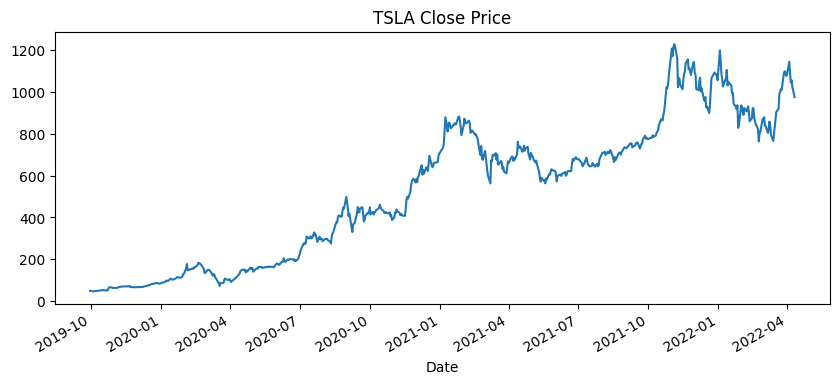

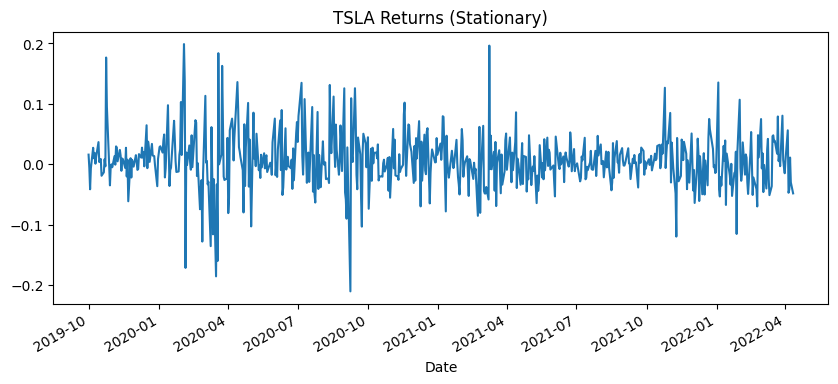

In [6]:

plt.figure(figsize=(10,4))
prices.plot(title="TSLA Close Price")
plt.show()

plt.figure(figsize=(10,4))
returns.plot(title="TSLA Returns (Stationary)")
plt.show()

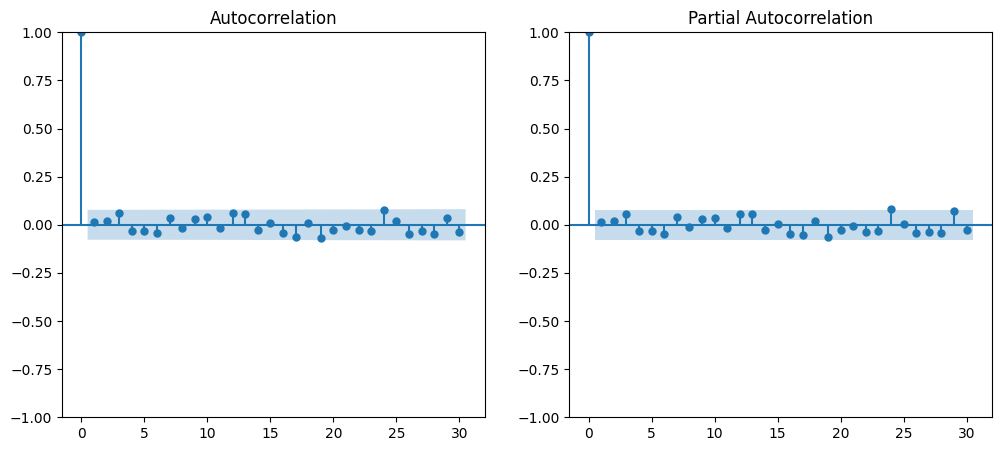

In [7]:

plt.figure(figsize=(12,5))

plt.subplot(121)
plot_acf(returns, lags=30, ax=plt.gca())

plt.subplot(122)
plot_pacf(returns, lags=30, ax=plt.gca())

plt.show()


First 5 rows:
         Date       High        Low       Open      Close      Volume  \
0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0   
1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0   
2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0   
3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0   
4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0   

   Adj Close  
0  48.174000  
1  48.938000  
2  48.625999  
3  46.605999  
4  46.285999  

----- ADF Test -----
ADF Statistic : -24.837818399003506
p-value       : 0.0
Series is Stationary ✅


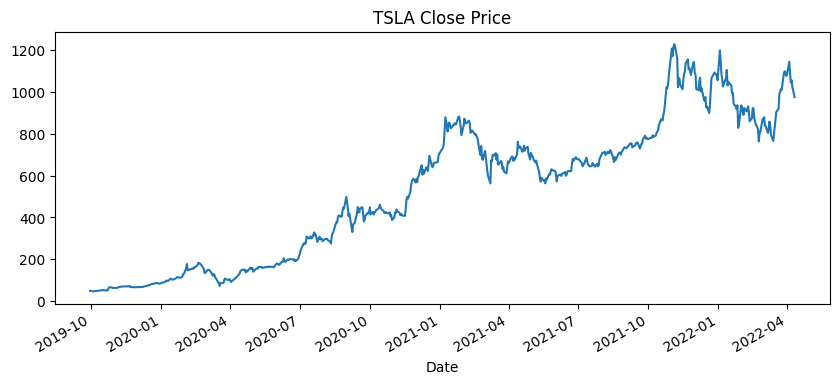

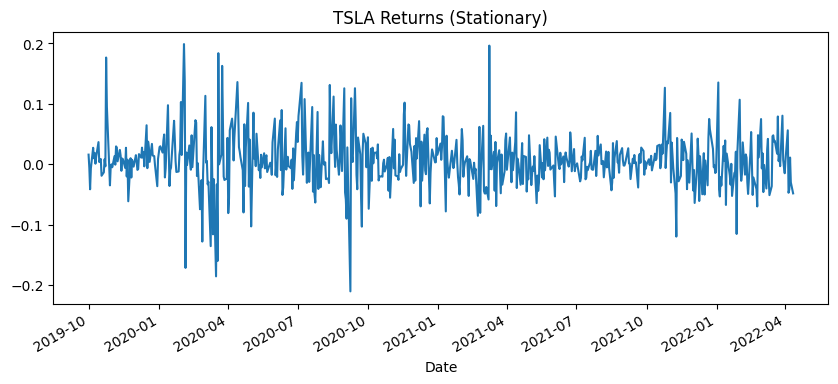

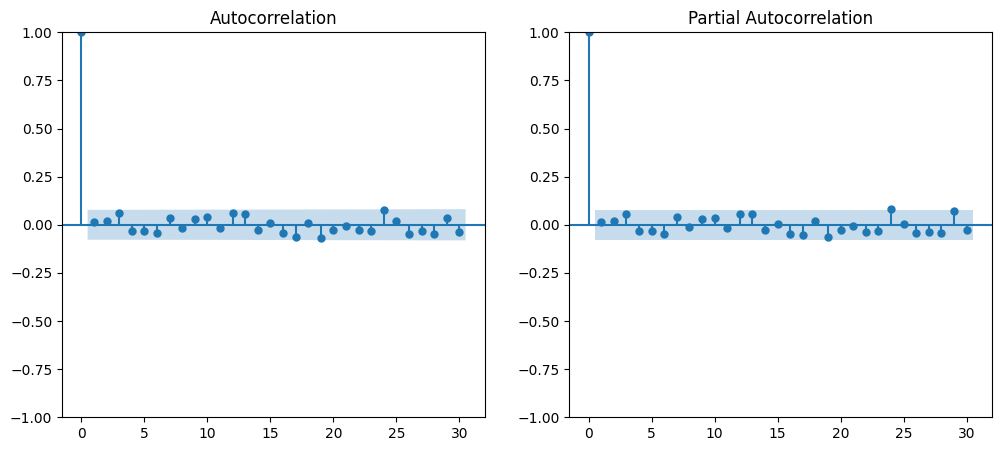

C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava


AR Model
Order: (3, 0, 0)
AIC : -1688.7112339016446
BIC : -1667.5391802730528
MSE : 0.0017650041976281395


C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha


MA Model
Order: (0, 0, 3)
AIC : -1689.6294155915818
BIC : -1668.45736196299
MSE : 0.0017649437556277363


C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\heera\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



ARMA Model
Order: (2, 0, 2)
AIC : -1689.5096352096598
BIC : -1664.1031708553496
MSE : 0.0017658220905961072


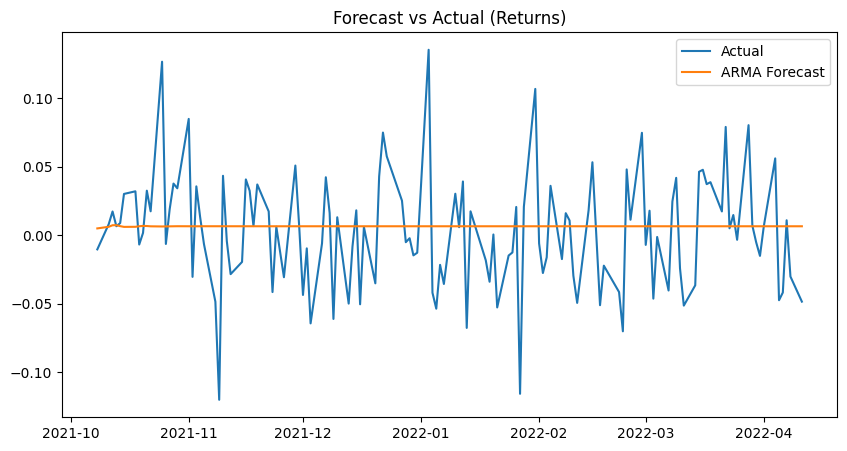


Showing ARMA residual diagnostics...


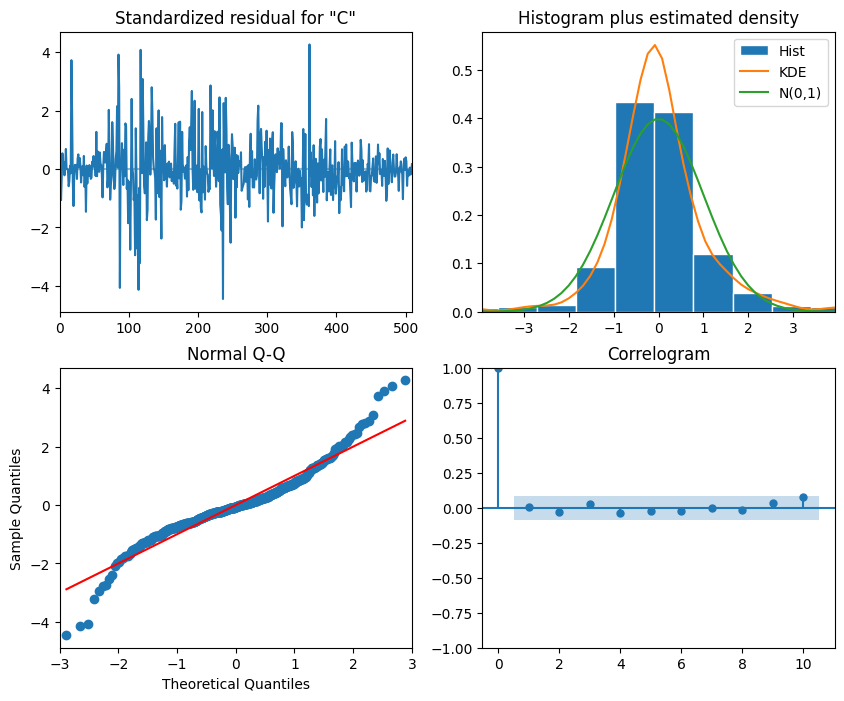


Forecast saved as tsla_forecast_output.csv ✅


In [1]:







# ======================
# TRAIN TEST SPLIT
# ======================
train_size = int(len(returns) * 0.8)
train = returns[:train_size]
test = returns[train_size:]


# ======================
# MODEL TRAINING
# ======================

def evaluate_model(order, name):
    model = ARIMA(train, order=order)
    fit = model.fit()

    pred = fit.forecast(steps=len(test))

    mse = mean_squared_error(test, pred)

    print(f"\n{name}")
    print("Order:", order)
    print("AIC :", fit.aic)
    print("BIC :", fit.bic)
    print("MSE :", mse)

    return fit, pred


# AR
ar_fit, ar_pred = evaluate_model((3,0,0), "AR Model")

# MA
ma_fit, ma_pred = evaluate_model((0,0,3), "MA Model")

# ARMA
arma_fit, arma_pred = evaluate_model((2,0,2), "ARMA Model")


# ======================
# FORECAST COMPARISON PLOT
# ======================
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, arma_pred, label="ARMA Forecast")
plt.legend()
plt.title("Forecast vs Actual (Returns)")
plt.show()


# ======================
# RESIDUAL DIAGNOSTICS
# ======================
print("\nShowing ARMA residual diagnostics...")
arma_fit.plot_diagnostics(figsize=(10,8))
plt.show()


# ======================
# SAVE BEST FORECAST
# ======================
forecast_df = pd.DataFrame({
    "Actual": test,
    "Forecast": arma_pred
})

forecast_df.to_csv("tsla_forecast_output.csv")

print("\nForecast saved as tsla_forecast_output.csv ✅")
